In [1]:
# Version: 0.2
# Date: 21 Oct 2023
# Author: Sathish Balachandran

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def loss_calc(x, y, z, theta, thetazero):
    """function to calculate the training error rate from the losses
       based on hyperplane parameters - theta and thetazero
    """
    loss_val = 0
    for i in range(len(x)):
        # predicting y based on theta and thetazero
        y_pred = theta * x[i] + thetazero
        
        # classifier based on prediction
        z_pred = 1 if y[i] >= y_pred else -1
        
        # sums all loss counts
        if z[i] != z_pred:
            loss_val += 1
    
    # returns training error rate
    return loss_val/len(x)

In [4]:
def random_linear_classifier(x, y, z, k):
    """Random numbers are used to find theta and theta zero
       which are used to find the prediction for classification
    """
    theta, thetazero, errorrate = [], [], []
    for j in range(k):
        # generate random values for theta and thetazero
        theta_temp = np.random.uniform(-5,5)
        thetazero_temp = np.random.uniform(-5,5)
        
        # keep track of the parameters and calculated training error rate
        theta.append(theta_temp)
        thetazero.append(thetazero_temp)
        errorrate.append(loss_calc(x, y, z, theta_temp, thetazero_temp))
    
    # finding the minimum error rate and its index
    error_min = min(errorrate)
    min_index = errorrate.index(error_min)
    
    # return corresponding theta and thetazero for the minimum error rate
    return theta[min_index], thetazero[min_index], error_min

In [5]:
# obtaining user inputs for the range and width of x values
xmin = float(input("Enter minimum value (integer) for the range of x values: "))
xmax = float(input("Enter maximum value (integer) for the range of x values: "))
rangewidth = int(input("Enter the number (integer) of data to be considered: "))

Enter minimum value (integer) for the range of x values: 0
Enter maximum value (integer) for the range of x values: 200
Enter the number (integer) of data to be considered: 400


In [6]:
# calculating x values
np.random.seed(0)
x = np.linspace(xmin, xmax, rangewidth)

In [7]:
# obtaining slope and intercept for the actual classifier
m = float(input("Enter the slope value for the actual classifier: "))
c = float(input("Enter the intercept value for the actual classifier: "))

Enter the slope value for the actual classifier: 3
Enter the intercept value for the actual classifier: 4


In [8]:
# calculating actual and distributed y values
y_true = m * x + c
y = y_true + np.random.normal(0, 100, len(x))

In [9]:
# classifier based on sample hyperplane (here it is line)
z = np.where(y >= y_true, 1, -1)
x1, x2, y1, y2, z1, z2 = [], [], [], [], [], []

# seperating the data based on classifier
for i in range(len(x)):
    if y[i] >= y_true[i]:
        x1.append(x[i])
        y1.append(y[i])
    else:
        x2.append(x[i])
        y2.append(y[i])

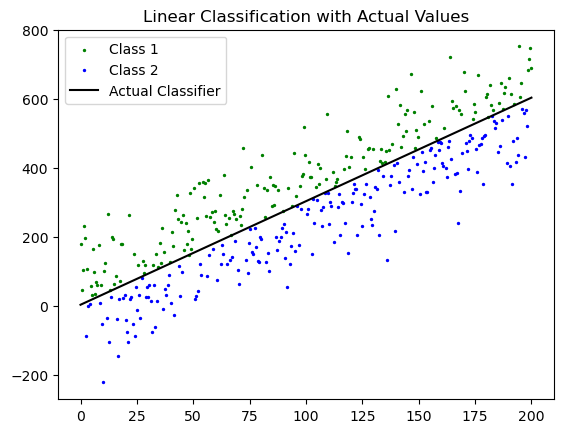

In [10]:
# plotting the original values
plt.figure()
plt.scatter(x1, y1, color='green', s=2, label='Class 1')
plt.scatter(x2, y2, color='blue', s=2, label='Class 2')
plt.plot(x, y_true, color='black', label='Actual Classifier')
plt.title('Linear Classification with Actual Values')
plt.legend()
plt.show()

In [11]:
# calculating parameters for a fixed hyper parameter (last argument)
theta, thetazero, loss_min = random_linear_classifier(x, y, z, 10)

In [12]:
# predicted y based on linear parameters
yp = theta * x + thetazero

In [13]:
# seperate data based on predicted classifier
x3, x4, y3, y4 = [], [], [], []
for i in range(len(x)):
    if y[i] >= yp[i]:
        x3.append(x[i])
        y3.append(y[i])
    else:
        x4.append(x[i])
        y4.append(y[i])

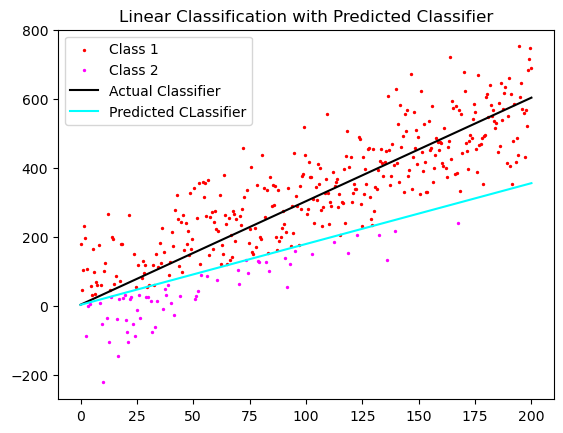

In [14]:
# plotting the original values along with predicted classifier
plt.figure()
plt.scatter(x3, y3, color='red', s=2, label='Class 1')
plt.scatter(x4, y4, color='magenta', s=2, label='Class 2')
plt.plot(x, y_true, color='black', label='Actual Classifier')
plt.plot(x, yp, color='cyan', label='Predicted CLassifier')
plt.title('Linear Classification with Predicted Classifier')
plt.legend()
plt.show()

In [15]:
# calculating the error rate for n times
errors = []
k = np.arange(1, 501)
for i in k:
    theta, thetazero, error_min = random_linear_classifier(x, y, z, i)
    errors.append(error_min)

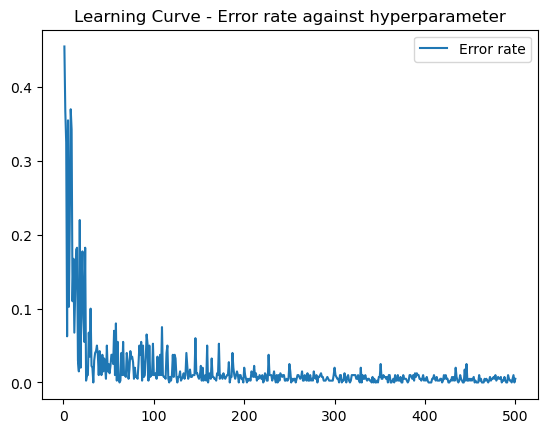

In [16]:
# plotting the minimum error rates against hyperparameter
plt.figure()
plt.plot(k ,errors, label='Error rate')
plt.title('Learning Curve - Error rate against hyperparameter')
plt.legend()
plt.show()